In [138]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import requests
from faker import Faker
import ujson as json
import pandas as pd
import requests
from numpy import random 
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch_dsl import Search, DocType, Date, Integer, Keyword, Text
from datetime import datetime
from elasticsearch_dsl.connections import connections
import requests
from random import randint
from pandas.io.json import json_normalize

ES_HOST = 'http://ec2-34-205-15-150.compute-1.amazonaws.com:9200'
INDEX = "eda1"
DOC_TYPE="user"
es = Elasticsearch(ES_HOST)

# Exploratory data analysis (EDA) 
It is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

##### Key Concepts

- Displaying data 
- Displaying distributions 
- Displaying info about the variables

##### There are 4 focal point. These are:

- measures of central tendency, i.e. the mean, the media and mode,
- measures of spread, i.e. variability, variants and standard deviation,
- the shape of the distribution, and
- the existence of outliers.

##### Types of data
- discrete (Number of orders customers have done)
- continuous (Total Revenue of Customers)
- categorical-nominal (RFM Score, Customer Status)
- Categorical-ordinal  (City)
- binary (Email Unsubscribed - Yes/No)




#####  Important Question to ask?
- What type of variation occurs within my variables?
- What type of covariation occurs between my variables?
- Which are response(dependednt) and predictor(independent) variables? 
- What are some obvious mistakes in data (recording errors etc)?
- What are some visible patterns in the data?
- Is there any violations of statistical assumptions?
- Can I generate some hypotheses?



##### Types of Variables and suggested EDA techinques

| Quantitative Variables                                                                             | Categorical  Variables                  | Quantitative &  Categorical                                                                                           |
|----------------------------------------------------------------------------------------------------|-----------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| - Interval variables - Ratio variables                                                             | - Ordinal Variables - Nominal Variables |                                                                                                                       |
| 1. Univariate(one variable) - Histograms  - Boxplots, - Stem & Leaf Plots - Quantile Normal Plots  | 1 variable:  Pie charts, Bar graphs     |                                                                                                                       |
| 2. Bivariate (two variables) - Scatterplots                                                        | 2 or more: Facetted PieCharts           | Bivariate  Line Graph, Bar Graph                                                                                      |
| 3 Three Variables -  Bubble Chart                                                                  |                                         | 2. One Categorical & 2 Quantitative  - Facetted Scatter Two Categorical & 1 Quantitative - Facetted Line or Barcharts |

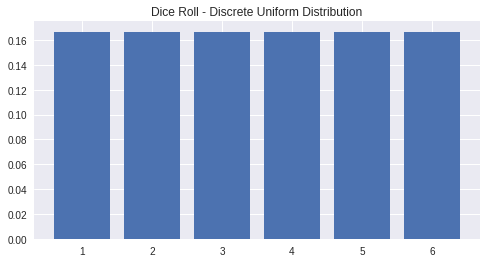

In [102]:
roll_options = [1,2,3,4,5,6]
#since index starts at 0
high_value = 7 
low_value = 1

plt.bar(roll_options,stats.randint.pmf(roll_options,low_value,high_value))
plt.title('Dice Roll - Discrete Uniform Distribution')
plt.show()


# Continuous Uniform Distribution

A continuous distribution is appropriate when the variable can take on (at least in theory) an infinite number of values. You can weigh 150.2311 kgs or 150.1012 kgs. 
- Continuous distributions cannot be written so neatly as the uniform discrete distribution,
- As a result, a continuous probability distribution cannot be expressed in tabular form.
- Instead, an equation or formula is used to describe a continuous probability distribution.

A continous random variable X with a probability density function is a continous uniform random variable when:
$f(x)=1(b−a)$ <br> $a<=x<=b$

Let's say a session that ends in a purchase is on avergae 25 mins long. After taking some time measurements from experiments we gather that all the purchase sessiosns are **uniformly distributed** between 19 and 37 minutes.
What is the probability density function of a purchase session, or f(x)?

In [126]:
b= 37
a = 19
fx = 1.0/(b-a)

#show 
print('The probability density function results in {:.4f}'.format(fx))

The probability density function results in 0.0556


In [129]:
#So let's ask the question, what's the probability that the session length will last 
# at least 25 minutes?

#f(27)
fx_1 = 27.0/(b-a)
#f(25)
fx_2 = 26.0/(b-a)

#Our answer is then
ans = fx_1-fx_2

#print
print (' The probability that the session will last at least 25 minutes is {:.1f} %'.format(100*ans))

 The probability that the session will last at least 25 minutes is 11.1 %


## 1. Data Analysis Framework
The six types of questions are:

- Descriptive Analytics: insight into the past
- Exploratory Analysis: generating an hypothesis
- Inferenial Analytics is guessing about something unobservable.
- Predictive Analytics: understanding the future
- Prescriptive Analytics: advise on possible outcomes
- Causal Anlytics: Understanding the cause for the observable outcome

### 1.1 Descriptive question
A descriptive question is one that seeks to summarize a characteristic of a set of data. Examples
- Revenue distribution among gender
- The average revenue per day 
- The frequency of cart abandonment in a set of carts created
- How many people have viewed this product

There is **no interpretation** of the result. The result is just a fact or an attribute of the data.

NOTE: Descriptive statistics are applied to populations

### 1.2 Exploratory Question
An exploratory question is one in which you analyze the data to see if there are patterns, trends, or relationships between variables. You are trying to generate a hypothesis but **not testing** the hypothesis. 

>For e.g. You have a feeling that email openers also take more discount on an e-commerce  website. You can explore this idea by examining customers email opening patterns with the amount of dicount they take. You might find pople who have opened more emails have taken more discount. Now you can propose a hypothesis that people who have opened more than 5 emails in last 6 months have taken an average 30% discount.


The basic goal here is you want to look at trends or relationships between variables in your data set.

### 1.3 Inferential Question
This question answers your hypothesis by analysis different sets of data. By analyzing this different set of data you are both determining if the association you observed in your exploratory analysis holds in a different sample which is a representative of the total population.
 
So in summary Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population


>eg. You can say 30% of customers  buy through mobile app. This is deccriptive because you are just stating a fact, but when you say 30% of customers who buy through mobile app have higher order value - this is inferential.

### 1.4 Predictive Question

Predictive modelling like Inferential modeling, crudely, just looks for associations between variables, whether controlled by the user or not. Prediction is guessing about something you can observe (just not right now); inference is guessing about something unobservable.

>e.g A predictive question would be one where you ask what types of customers will purchase with zero discount

The goal is to really produce a very good prediction of a given feature, given a set of other features, and the goal is not really to explain how things are working. 

### 1.5 Causal Question
Cause and Effect Questions Designed to determine whether one or more variables causes or affects one or more outcome variables.

Why customers are not completing their purchase or abandoning their carts?

### 1.6 Common Mistakes

| REAL QUESTION TYPE      | PERCEIVED QUESTION TYPE | PHRASE DESCRIBING ERROR                |
|:------------------------|:------------------------|:---------------------------------------|
| Inferential             | Causal                  | “Correlation does not imply causation” |
| Exploratory             | Inferential             | “Data dredging”                        |
| Exploratory             | Predictive              | “Overftting”                           |
| Descriptive             | Inferential             | “n of 1 analysis”                      |

There are a couple of additional points about the types of questions that are important. First, by necessity, many data analyses answer multiple types of questions. 


For example, if a data analysis aims to answer an inferential question, descriptive and exploratory questions must also be answered during the process of answering the inferential question. Let's say you are infering that high shipping price is related to high cart abandonment. You would start with determing the frequency of cart abandonment, average shipping price in descriptive analytics. Than you will move to exploratory analysis of finding relationship between these two variables for a give sample. Then you will do inferential or predictive analysis based on these. 

### 2 Charactestics of a good question
1. It should be relevant to your audience.
2. It should not be answered already.
3. It should be plausible.
4. It should be answerable. 
5. It should be very specific.


> for e.g You are asking - does higher shipping increases cart abandonment? 
This question is relevant to e-commerce, It's plausible, answerable but not very specific. 

>Let's rephrase the question
"Does shipping rates of  $10 or more translates into cart abandonment rates higher than average?
 

## Histograms
- Learn how to summarize quantitative data graphically using a histogram.
- Learn how to construct histograms for discrete data.
- Learn how to construct histograms for continuous data.
- Learn the distinction between frequency histograms, relative frequency histograms, and density histograms.